In [1]:
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Init the CNN model

In [2]:
cnn_model = Sequential()

In [3]:
target_size = (128,128,3)

### Add Convolution Layer

In [4]:
#filters -- No of filters
#kernel_size -- filter size
#strides -- strides
conv_layer = Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), 
                    padding = "valid", activation = "relu",input_shape = target_size)

In [5]:
cnn_model.add(conv_layer)

### Add Max Pool layer

In [6]:
pool_layer = MaxPool2D(pool_size = (2,2), strides = (2,2))

In [7]:
cnn_model.add(pool_layer)

### Add Conv Layer-2

In [8]:
conv_layer_2 = Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), 
                    padding = "valid", activation = "relu")
cnn_model.add(conv_layer_2)

## Maxpool layer -2

In [9]:
pool_layer_2 = MaxPool2D(pool_size = (2,2), strides = (2,2))
cnn_model.add(pool_layer_2)

### Add Flatten layer

In [10]:
flatten_layer = Flatten()

In [11]:
cnn_model.add(flatten_layer)

### Add Hidden / FC layer

In [12]:
#units -- no of neurons in hidden layer
# kernel -- weights -- kernel_initializer -- strategy to init the weights
#activation -- the activation function for this layer
fc_layer = Dense(units = 500, kernel_initializer = "random_uniform", activation = "relu", bias_initializer = "random_uniform")

In [13]:
cnn_model.add(fc_layer)

### Add output layer

In [14]:
op_layer = Dense(units = 1, activation = "sigmoid" ,  kernel_initializer = "random_uniform", bias_initializer = "random_uniform")

In [15]:
cnn_model.add(op_layer)

In [16]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 500)               2

In [17]:
plot_model(cnn_model, show_shapes=True,
    show_dtype=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Compile the model

In [18]:
adam_o = Adam(learning_rate=0.001)

In [19]:
cnn_model.compile(loss = "binary_crossentropy", optimizer = adam_o, metrics = ["accuracy"])

### Image Data Generator

In [20]:
train_gen = ImageDataGenerator(rotation_range = random.randint(0,5),
                               shear_range = random.randint(0,10)/100,
                               zoom_range = [0,1],
                               horizontal_flip = True,
                               vertical_flip=True,
                               rescale = 1.0/255)

In [21]:
test_gen = ImageDataGenerator(rescale = 1.0/255)

In [22]:
#path
train_data = train_gen.flow_from_directory(r"data\dataset\training_set", target_size=target_size[:2], 
                                           color_mode='rgb', class_mode = "binary",batch_size=32, shuffle=True,)

Found 7374 images belonging to 2 classes.


In [23]:
train_data

In [24]:
test_data = test_gen.flow_from_directory(r"data\dataset\test_set", target_size=target_size[:2], color_mode='rgb',
                              class_mode = "binary",batch_size=32, shuffle=False,)

Found 2000 images belonging to 2 classes.


In [25]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [26]:
next(train_data)[0].shape

(32, 128, 128, 3)

In [27]:
next(train_data)[1].shape

(32,)

In [28]:
8000/32

250.0

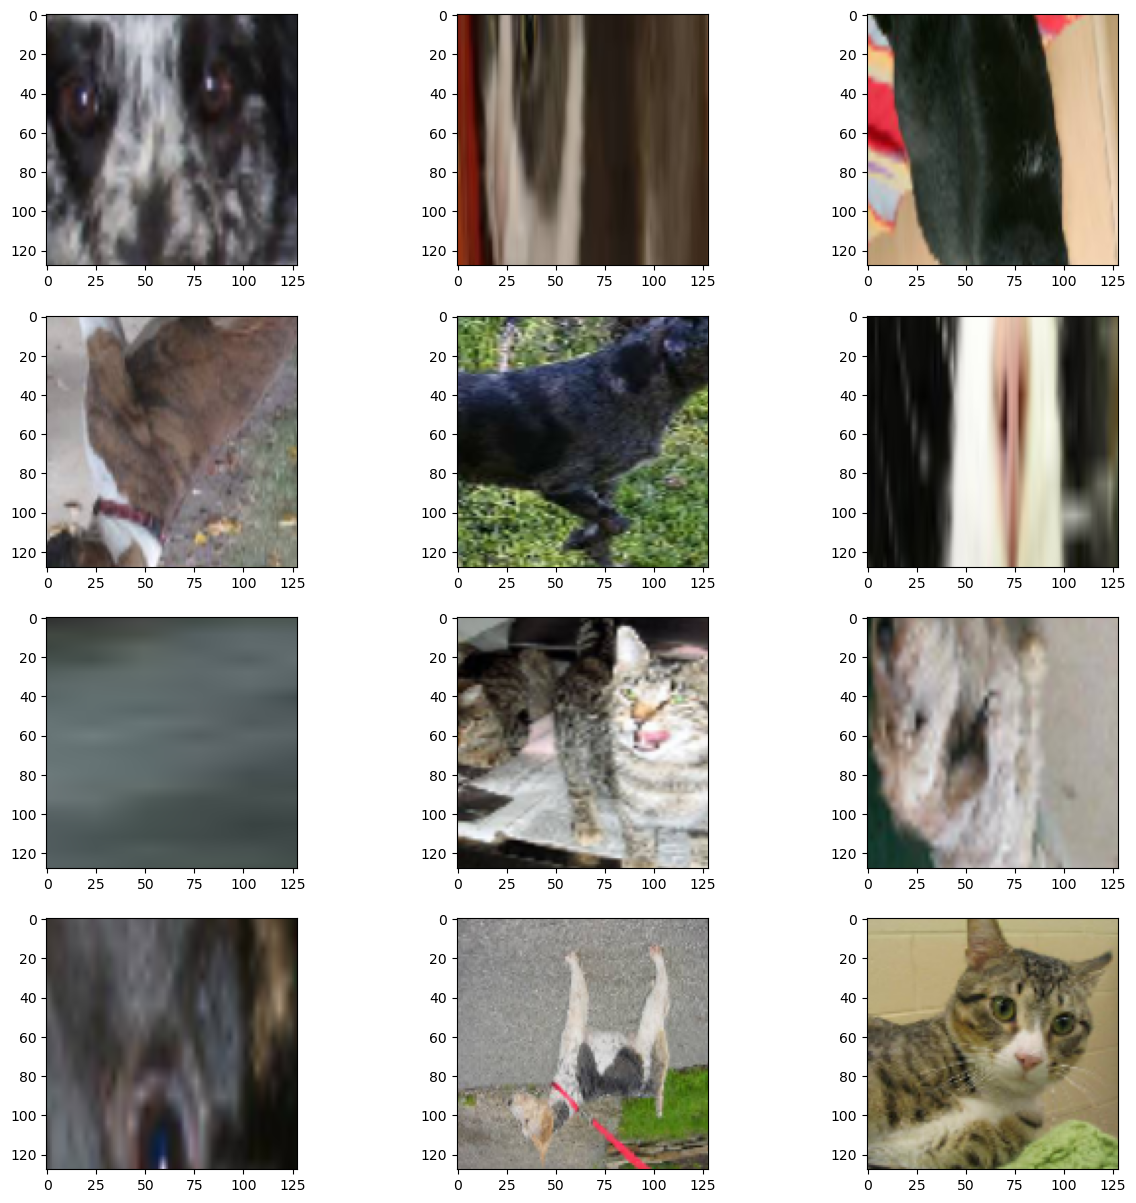

In [29]:
plt.figure(figsize = (15,15) )
for idx, each_batch in enumerate(train_data,1):
    img = each_batch[0][0]
    plt.subplot(4,3,idx)
    plt.imshow(img)
    if idx >= 12:
        break

In [30]:
ckpt = ModelCheckpoint("best_epoch_cnn.h5", monitor = "val_accuracy", 
                       mode='max', save_best_only=True)

In [31]:
cnn_model.fit(train_data, epochs=30, validation_data = test_data, callbacks=[ckpt])

Epoch 1/30
231/231 [==============================] - ETA: 0s - loss: 0.7391 - accuracy: 0.5449

C:\Users\7240\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


231/231 [==============================] - 374s 2s/step - loss: 0.7391 - accuracy: 0.5449 - val_loss: 0.6980 - val_accuracy: 0.5005
Epoch 2/30
231/231 [==============================] - 305s 1s/step - loss: 0.6819 - accuracy: 0.5671 - val_loss: 0.6929 - val_accuracy: 0.5610
Epoch 3/30
231/231 [==============================] - 303s 1s/step - loss: 0.6716 - accuracy: 0.5852 - val_loss: 0.6579 - val_accuracy: 0.6130
Epoch 4/30
231/231 [==============================] - 276s 1s/step - loss: 0.6640 - accuracy: 0.6027 - val_loss: 0.6574 - val_accuracy: 0.6485
Epoch 5/30
231/231 [==============================] - 263s 1s/step - loss: 0.6552 - accuracy: 0.6268 - val_loss: 0.6522 - val_accuracy: 0.6275
Epoch 6/30
231/231 [==============================] - 262s 1s/step - loss: 0.6429 - accuracy: 0.6341 - val_loss: 0.6773 - val_accuracy: 0.5895
Epoch 7/30
231/231 [==============================] - 260s 1s/step - loss: 0.6353 - accuracy: 0.6532 - val_loss: 0.6551 - val_accuracy: 0.6170
Epoch 8/30

In [32]:
cnn_model.save("cnn_cd.h5")

#### Load the model

In [33]:
from tensorflow.keras.models import load_model

In [34]:
model = load_model("cnn_cd.h5")

In [35]:
y_pred = model.predict(test_data)

63/63 [==============================] - 15s 231ms/step


In [36]:
y_pred

array([[0.84132767],
       [0.5968487 ],
       [0.17026651],
       ...,
       [0.0075666 ],
       [0.69410986],
       [0.6581615 ]], dtype=float32)

In [37]:
y_test = test_data.classes

In [38]:
y_pred = y_pred > 0.5

In [39]:
y_pred = y_pred.astype("int")

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
accuracy_score(y_test, y_pred)

0.708

In [42]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

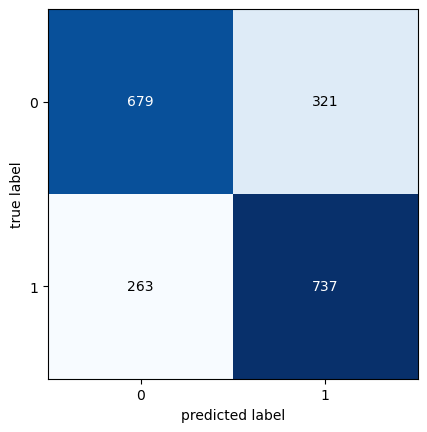

In [43]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1000
           1       0.70      0.74      0.72      1000

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000

